## Bag Of Words

In [1]:
import genome_helpers as ge
import load_genomes 
import pickle

def pickle_save(filename, variable):
    filename = filename+'.pkl'
    output = open(filename, 'wb')
    pickle.dump(variable, output)
    output.close()
    print(filename + " Saved!")
    return True

def pickle_open(filename, df=False):
    """Eventually check if we are opening a python 3 or python 2 file 
    and deal with discrepencies (python 3 pickle opened in python 2 etc...)"""
    if df == True:
        file = pd.read_pickle(filename)
        print(filename + " dataframe sucessfully loaded!")
    else:
        file = pickle.load( open( filename, "rb" ) )
        print(filename + " sucessfully loaded!")
    return file

In [107]:
de = pickle_open('genome_dictionary.pkl.pkl')
r_pairs = pickle_open('r_pairs.pkl')
f_pairs = pickle_open('f_pairs.pkl')

genome_dictionary.pkl.pkl sucessfully loaded!
r_pairs.pkl sucessfully loaded!
f_pairs.pkl sucessfully loaded!


In [108]:
def addSequence(d):
    for i,pair in enumerate(f_pairs):
        
        pair["seq"] = pair.apply(lambda x: d[i][0][int(x[1]):int(x[0])],axis=1)
        pair["predicted"] = True
    for i,pair in enumerate(r_pairs):
        rd = ge.reverse_complement(d[i][0])
        pair["seq"] = pair.apply(lambda x: rd[int(x[1]):int(x[0])],axis=1)
        pair["predicted"] = True

addSequence(de)

In [109]:
x = pickle_open('all_frequency_data_X.pkl')
y = pickle_open('all_frequency_data_Y.pkl')

all_frequency_data_X.pkl sucessfully loaded!
all_frequency_data_Y.pkl sucessfully loaded!


In [110]:

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [111]:
all_df = pd.concat([y,x],axis=1)


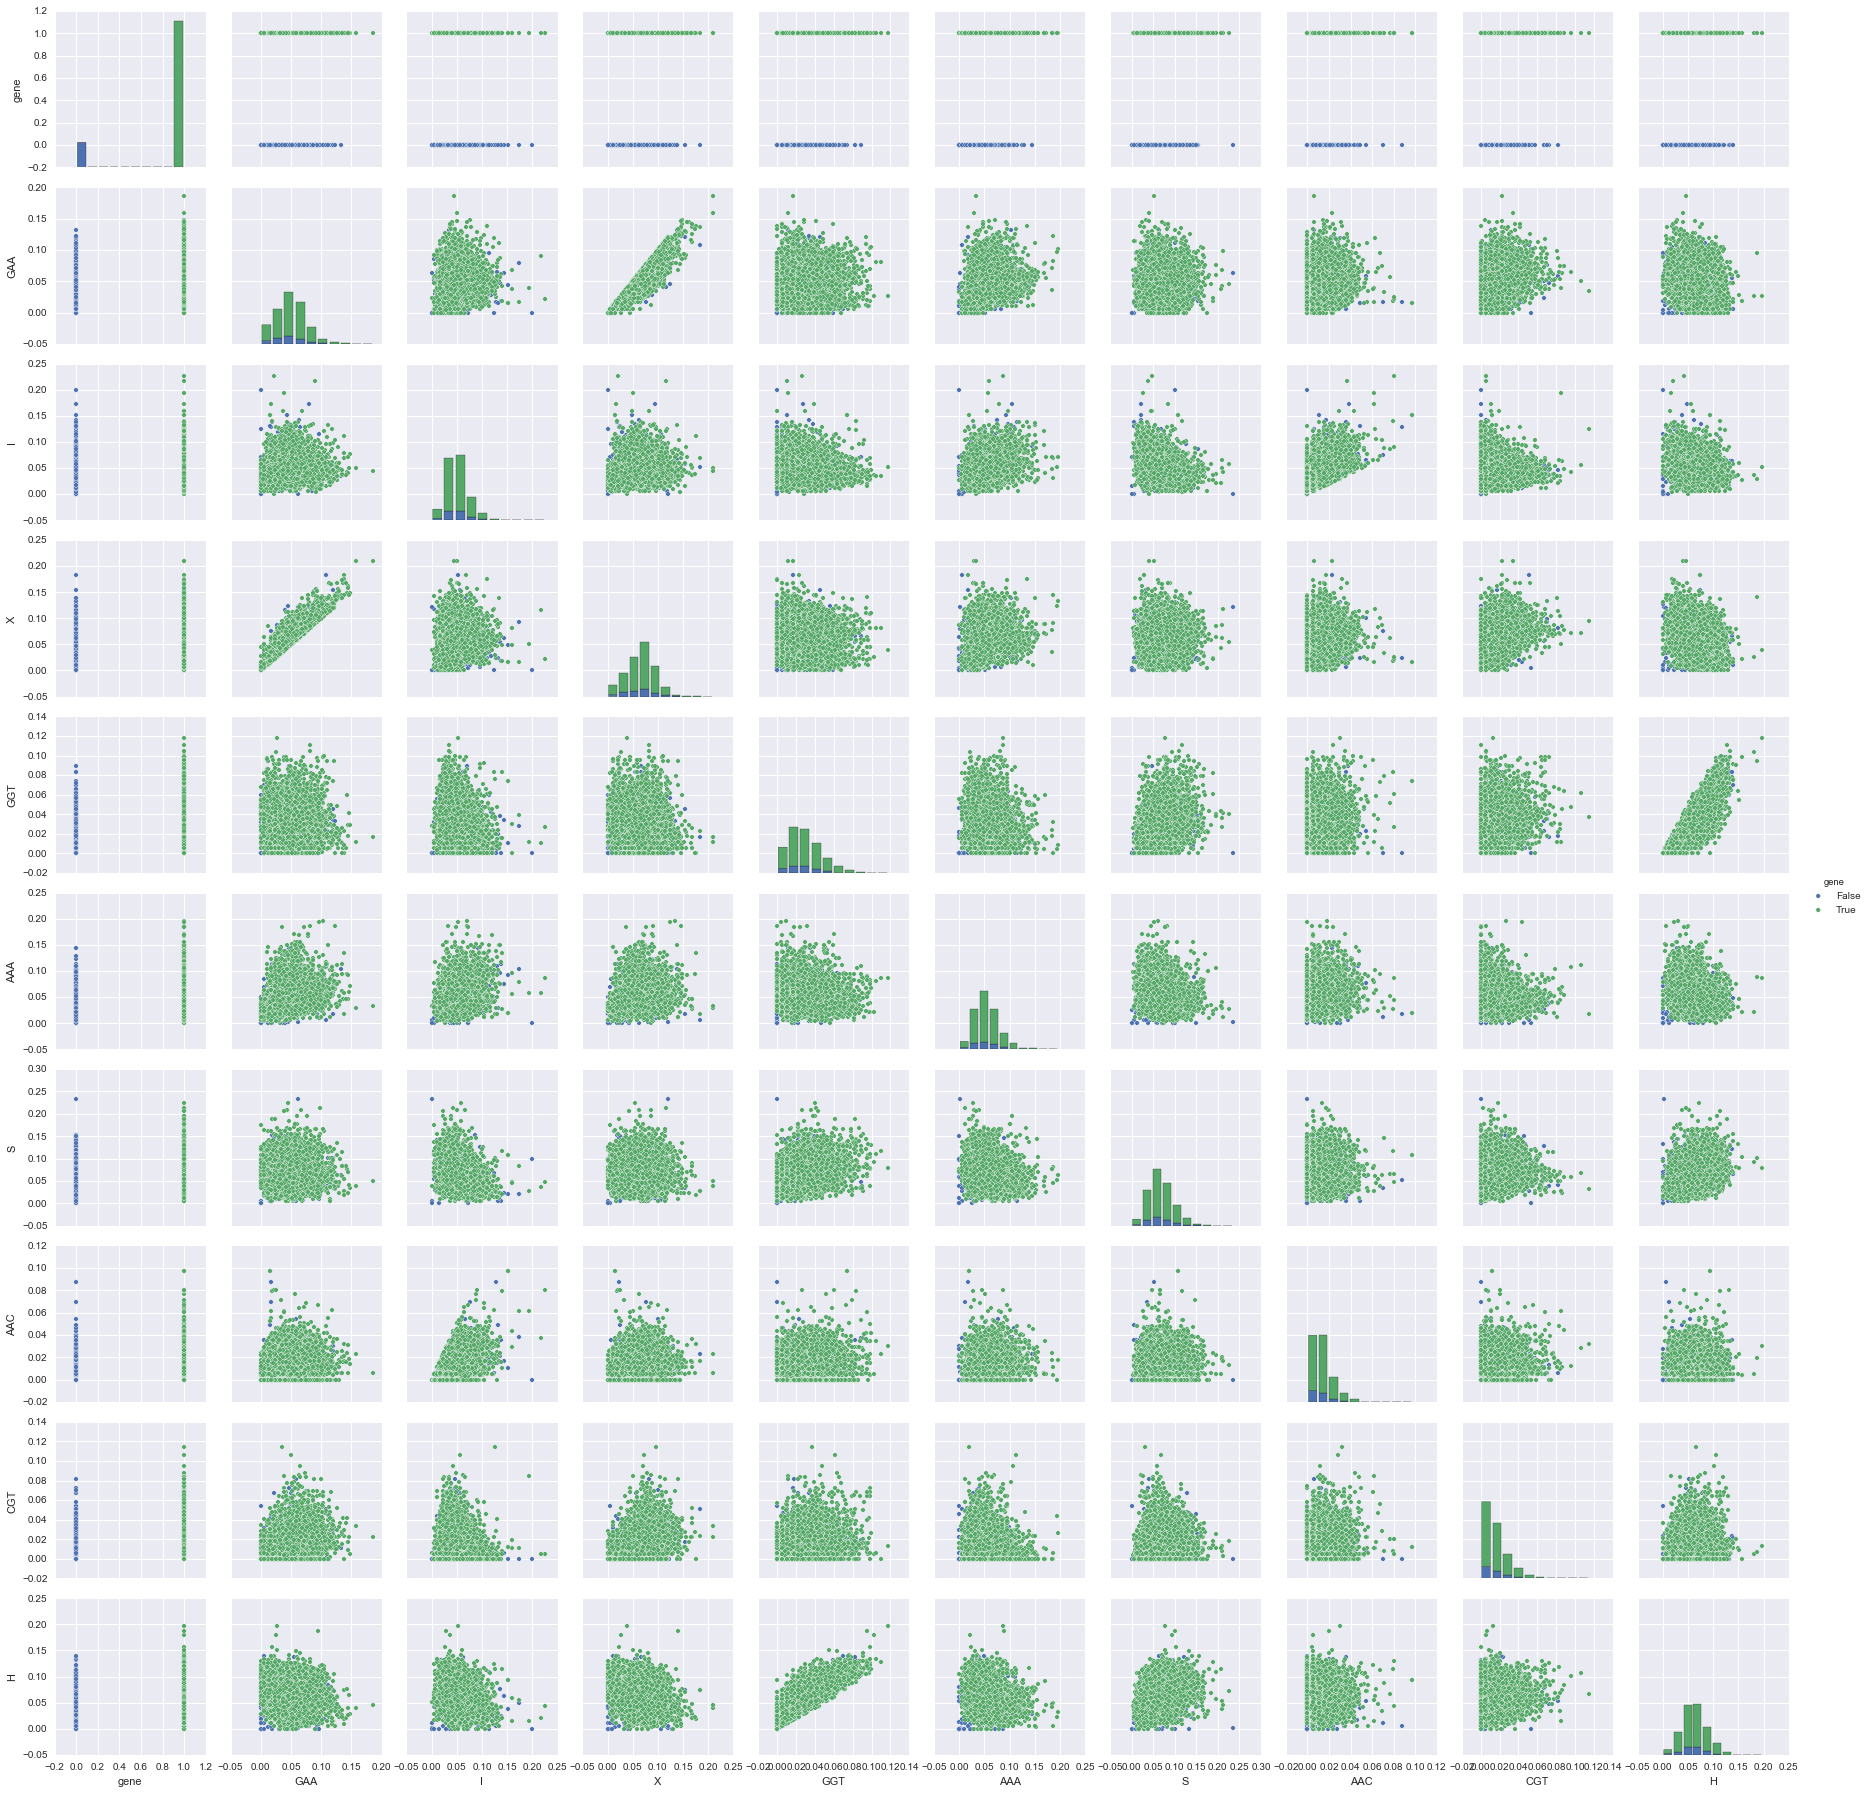

In [28]:
xs = all_df[['gene','GAA', 'I', 'X', 'GGT', 'AAA', 'S', 'AAC', 'CGT', 'H']]
sns.pairplot(xs,hue='gene')

In [112]:
forwards = pickle_open('all_forward_mergers.pkl')
reverses = pickle_open('all_reverse_mergers.pkl')


all_forward_mergers.pkl sucessfully loaded!
all_reverse_mergers.pkl sucessfully loaded!


In [7]:
## Data must be merged with genome # kept! (go back and merge with that in the regions df)
## Fill up seq with start_y to end, fill up predicted Nan with False
## Save this!  --- > False +, True +, Unpredicted segments

In [113]:
regions_list = pickle_open('regions_list.pkl')


regions_list.pkl sucessfully loaded!


In [114]:
import pandas as pd
df = pd.concat(regions_list)
df = df[df.state != 'N']

df = df.reset_index()
df["aas"] = df.seq.apply(lambda seq: ge.codonToAA(ge.tri_split(seq)))
# df["codons"] = df.seq.apply(lambda seq: ge.tri_split(seq))
df["gene"] = True

# df.drop('level_0')

In [200]:
df.sample(n=10).iloc[0].seq

'ATGGAAATTTACAAACAAAGAATGATTGAAGAATATAAACAGTTAAAAAAACGCGCAGAAAAACTATCTATTGTGCTAAACAGATACTACCTTGATGAGTTAGATTTTGAATTATCTTGCCCAATTGAACTTTTACAAACGCAATGGCATATTATGGGAGCGTATTTGAAAATTCTAGAACAAAGATTTTTGGTTGAAGGGATTTATTTTAATGATTGA'

In [124]:
genome0 = df[df.level_0 == 0][df.state != 'N']

/Users/ingrid/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [ ]:
## visualization 
## pair plots of the frequency features
## fix the image of the colored genome == base pairs
# DONE --> Don't see distinction and only tried top 10 features from linear regression model

## Bag of words
## split the seq segments into n-grams
## attempt a few clustering methods (use k-means) to find relationships between n-grams


## given a genome -- > can we take any codon and predict how likely it is a stop in a gene
## We take the 500 bp prior and check
## if there is an X (stop) in the 500 bp before it -- disgard
## we can take the frequencies of codons, aas, sequences along wtih any features created by bag of words model

## PCA Analysis
## Ridge Regression 
## Stratified Cross validation

## Neural network --> tensorFlow
## we now have our features so we can do this to improve predictive performance

## slides
    ## images of tools used in this project
    ## work flow and features used
    ## Performance discussion and the need again for this work
    ## Framing the problem - 
    ## A. Industry costs
    ## Relationships between genes in each genome provided -- D3 thing
    ## 

## Flask - App Load Genome : 
    ## Features, 
## recommendation engines, predictive models, nlp

In [129]:
merged0 = pd.concat([forwards[0],reverses[0]])
merged0 = merged0[merged0.predicted == True]
merged0.gene.value_counts()

True     1071
False     208
Name: gene, dtype: int64

In [145]:
import pandas as pd
merged_forwards = pd.concat(forwards)
merged_forwards["direction"] = "F"
merged_reverses = pd.concat(reverses)
merged_reverses["direction"] = "R"
merged_all = pd.concat([merged_forwards,merged_reverses])
merged_all.shape
merged_all.sample(n=20)

merge_predicted = merged_all[merged_all.predicted == True]

In [139]:
pd.isnull(merge_predicted.start_y.iloc[252])
pd.isnull(merge_predicted.start_y.iloc[1])

False

In [140]:
de[0][0][1:10]

'TGTTGATAT'

In [165]:
# new_seq_generator()

tester = merge_predicted.copy()
# merge_predicted["new_seq"] = merged_predicted.apply(lambda v: new_seq_generator(v),axis=1)
tester = tester.sample(n=10)
# tester
tester["new_seq"] =tester.apply(lambda v: new_seq_generator(v),axis=1)

In [163]:
de[3][0][444210:445050]

'ATGAATCCTGGTGATCTCCTGCTCTTACCTGATCCAGGTTATCCTGATTACTTGTCGGGAGTGAGTCTGGGTCGTGTAGCCTATGAAACTTTTCCTTTGACGGCTGAAAATGATTTTTTGCCAGATTTGGAAGCTATTCCTGAGGGGACAGCTCGCCGTGCTAAGTTTATCTATATCAATTACCCTAATAATCCTACGGGGGCTGTAGCGACAAAGGCTTTTTATGAAAAATTGGTTGCCTGGGCTAAGACCTACGAGGTAGGGGTGGTGAGTGATCTGGCTTACGGGGCTTTGGGATATCAGGGTTATGAGAATCCTAGTTTTTTGGCAACTCCTGGTGCCAAGGATGTAGGCATTGAGTTTTATACTTTCTCAAAAACCTTTAATATGGCAGGTTGGCGTTTGGCATTTGCGGGTGGAAATGCTGAAATGATTGAAGCCTTGAATCTGATTCAAGACCATCTTTTTGTGGGGATTTTTCCCGCTTTGCAGGAAGCTGGGATTGCAGCCCTCTTAGATCCTAAATCTGAAGAGGCAGTGGCCCAACTAAATGCGGTTTATGATAGCCGTCGAGATGCTTTTGTTCAGACAGCTGCTAATATTGGCTGGCAAGCCTTTCCATCCAGAGGTTCCTTTTATGCTTGGATGCCTGTACCTAAGGGCTATACCAGTGAAAGTTTTGCAGATCTTTTGCTTGAGAAGGCCCATGTTGCTGTGGCACCAGGAAAAGGGTTTGGACCAGCAGGTGATGCTTATGTTCGTATCGGGCTTTTGGTAGAGCCGGAGCGTCTGGTCGAAGCTGTCAATCGTATTGCTGACCTGCATTTATTTAATAACTAG'

In [164]:
merge_predicted.sample(n=10)
def new_seq_generator(v):
    if pd.isnull(v.start_y):
        new_seq = v.seq
    else:
        data = de[int(v.genome)][0]
        if v.direction == 'F':
            new_seq = data[int(v.start_y):int(v.end)]
        else:
            r_data = ge.reverse_complement(data)
            new_seq = r_data[int(v.start_y):int(v.end)]
            
    return new_seq

In [169]:
# merge_predicted["new_seq"] = merge_predicted.apply(lambda v: v.direction,axis=1)
# merge_predicted
merge_predicted["new_seq"] = merge_predicted.apply(lambda v: new_seq_generator(v),axis=1)
# merge_predicted["new_seq"] = merged_predicted.apply(lambda v: v[4] if pd.isnull(v[6]) else de[0][0][v[6]:v[0]],axis=1)

/Users/ingrid/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [60]:
merge_predicted.gene.value_counts()

True     5623
False     949
Name: gene, dtype: int64

In [171]:
def frameShift(seq,shift):
    """input: seq and shift -- shift not used...."""
    new_seq = ''
    for j, i in enumerate(seq):
        if (j-2) % shift == 0:
            new_seq = new_seq + i + ' '
        else: 
            new_seq = new_seq + i
    return new_seq
merge_predicted["shifted"] = merge_predicted.new_seq.apply(lambda seq: frameShift(seq,3))

/Users/ingrid/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [59]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(analyzer = 'char_wb', ngram_range=(1,3), min_df= 1)
# d = vectorizer.fit_transform(list(gene_df['sequence']))

In [21]:
np.array(merge_predicted.FeatureCounts.iloc[0])

array([4, 3, 1, 1, 0, 3, 0, 2, 0, 0, 1, 6, 4, 0, 1, 1, 5, 1, 1, 1, 2, 1, 1,
       1, 5, 3, 4, 4, 3, 0, 0, 2, 4, 2, 1, 1, 1, 5, 1, 4, 2, 0, 0, 0, 3])

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" : ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,ngram_range=(1, 3))
tf = tf_vectorizer.fit_transform(merge_predicted.shifted)
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(nmf, tf_feature_names, n_top_words)


Topic #0:
gcc : acc : gtc : ggc : gtg : ctc : ggg : cta : ctg : agc : tcc : cgc : cag : gac : gcg : tac : ccc : acg : cac : aac
Topic #1:
tca aca : agc : aca agt : aca tca : tca aca agt : acg : agt gca : agc aca : gtg : tca tta : tta agt : gtg agt : tca tta agt : agc aca tca : acg tca : gac tca : gac : aca agc : gca agc : aca tca aca
Topic #2:
ata : cta : aga : gtg : gcg : acg : att att : att tta : tcg : tta tta : tta att : ggg : ttt tta : ttt att : ttc : ata tta : tta ttt : tta ata : tta aat : tcc
Topic #3:
cgt : gag : aac : gac : ttc : cac : gtg : gcc : cgc : gtc : tac : gcg : gaa gaa : cgt gaa : att gaa : gtt gaa : gaa gat : gaa cgt : gaa gtt : aaa gaa
Topic #4:
ttc : tgg : tac : aac : cta : ctc : cac : ggc : ttc ttt : gtc : ttt att : agc : ttc tta : ttt ggt : ggt att : att ggt : tgt : att att : cgt : att ttc
Topic #5:
acg : gcg : ccg : gtg : act gat : gtc : aaa gcg : aca gat : gat tta : ggt aat : gcg act : cca aat : tcg : gat aat : gat aaa : gaa ggt : aaa gca : cct att : aca cct : 

In [198]:
from nltk.util import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 2
grams = ngrams(sentence.split(), n)
' '.join(('this', 'is'))
[' '.join((gram)) for gram in grams]

['this is',
 'is a',
 'a foo',
 'foo bar',
 'bar sentences',
 'sentences and',
 'and i',
 'i want',
 'want to',
 'to ngramize',
 'ngramize it']

In [227]:
seq = 'ATGGAAATTTACAAACAAAGAATGATTGAAGAATATAAACAGTTAAAAAAACGCGCAGAAAAACTATCTATTGTGCTAAACAGATACTACCTTGATGAGTTAGATTTTGAATTATCTTGCCCAATTGAACTTTTACAAACGCAATGGCATATTATGGGAGCGTATTTGAAAATTCTAGAACAAAGATTTTTGGTTGAAGGGATTTATTTTAATGATTGA'

ttt = codon_dictionary(frameShift(seq.lower(),3))
# pd.DataFrame(ttt)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [223]:
k = tf_feature_names
v = [0]*len(k)
d = dict(list(zip(k,v)))

In [228]:
from nltk.util import ngrams

def codon_dictionary(words):
    list_of_words = words.split()
    
    n = 2
    grams = ngrams(words.split(), n)
    list_of_words += list_of_words + [' '.join((gram)) for gram in grams]
    
    n = 3
    grams = ngrams(words.split(), n)
    list_of_words += [' '.join((gram)) for gram in grams]
#     print(list_of_words)
#     k = set(list_of_words)
    k = tf_feature_names
    v = [0]*len(k)
    d = dict(list(zip(k,v)))
    for word in list_of_words:
        try:
            d[word] += 1
#             print(word)
        except:
            continue
    vector = list(d.values())
#     print(vector)
    return vector

In [229]:
merge_predicted["FeatureCounts"] = merge_predicted.shifted.apply(lambda string: codon_dictionary(string.lower()) )

/Users/ingrid/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [230]:
pickle_save('merge_predicted_ngramcounts',merge_predicted)

merge_predicted_ngramcounts.pkl Saved!


True

In [184]:
def codon_dictionary(list_of_words):
#     k = set(list_of_words)
    k = tf_feature_names
    v = [0]*len(k)
    d = dict(list(zip(k,v)))
    for word in list_of_words:
        try:
            d[word] += 1
        except:
            continue
    vector = list(d.values())
    return vector

merge_predicted["FeatureCounts"] = merge_predicted.shifted.apply(lambda string: codon_dictionary(string.lower().split()) )

KeyboardInterrupt: 

In [42]:
np.sum(np.array(merge_predicted.FeatureCounts.iloc[0])*nmf.components_[6])
# nmf.components_[6]

66.723693409637121

In [174]:
def feature_score(feature_vector):
    scores = []
    for i in range(nmf.components_.shape[0]):
        feature = nmf.components_[i]
        score = feature*np.array(feature_vector)
        sum_score = np.sum(score)
        scores.append(sum_score)      
    return scores

In [175]:
merge_predicted["FeatureScoresList"] = merge_predicted.FeatureCounts.apply(lambda feature_vector: feature_score(list(feature_vector)))

/Users/ingrid/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
# pd.DataFrame(merge_predicted.FeatureScoresList)
# list(merge_predicted.FeatureScoresList.iloc[1])
tester = pd.DataFrame(list(merge_predicted.FeatureScoresList))
# pd.concat([tester, merge_predicted.gene],axis=1)
# tester.shape
# teee = merge_predicted.gene.reshape(6572,1)
# teee
tester.shape

merge_predicted.gene.shape

tester = pd.DataFrame(list(merge_predicted.FeatureScoresList))
teee = merge_predicted.gene.reshape(6572,1)
tester["gene"] = teee

In [82]:
tester

,0,1,2,3,4,5,6,7,8,9,gene
0,122.829189,41.853557,108.215153,100.104228,138.305457,156.628472,66.723693,145.458405,85.614121,273.425535,True
1,139.284148,66.272174,167.478826,79.262592,81.579234,108.806088,74.004358,212.959607,64.658411,175.526435,True
2,148.741551,25.736928,134.673413,90.545667,67.229698,67.860304,90.383345,66.070214,35.953841,196.697396,True
3,61.326039,72.635386,57.677356,72.295469,83.425102,78.764034,52.499911,92.906888,51.177008,177.682896,True
4,129.710860,54.448957,53.569796,73.274580,58.675731,63.584813,70.978947,108.923049,51.177361,200.764436,True
5,97.313832,74.341889,76.149697,50.615373,40.363582,36.798236,34.125832,127.508997,49.560347,150.506533,True
6,188.893360,99.121399,115.574929,112.240609,122.079066,113.104147,99.213296,256.877657,109.272725,229.675239,False
7,57.635046,38.019406,176.868443,41.062464,78.490631,53.125068,29.695103,100.315601,17.404579,146.186210,False
8,56.577525,23.988263,41.097610,46.590271,44.263215,71.013717,23.021126,191.296341,43.507186,108.175425,True
9,110.861314,109.143124,134.027310,72.678160,121.143683,114.452074,41.758227,111.139768,37.767062,206.260749,True


In [45]:
topics = pd.DataFrame(nmf.transform(tf))  #topics(10) by document
topics.head()


,0,1,2,3,4,5,6,7,8,9
0,0.026480,0.048773,0.193207,0.357393,0.234217,0.229089,0.058114,0.073031,0.028618,0.130587
1,0.231146,0.037196,0.221443,0.206441,0.143490,0.104261,0.279512,0.131349,0.215344,0.000000
2,0.137027,0.044541,0.326476,0.127637,0.020801,0.066769,0.101884,0.090354,0.064926,0.103755
3,0.148214,0.141777,0.068277,0.201250,0.271525,0.117803,0.008328,0.000000,0.040694,0.133812
4,0.145934,0.116881,0.189212,0.116390,0.102600,0.142411,0.000000,0.143520,0.000000,0.228756


In [ ]:
import genome_helpers as ge
import load_genomes 
import pickle

def pickle_save(filename, variable):
    filename = filename+'.pkl'
    output = open(filename, 'wb')
    pickle.dump(variable, output)
    output.close()
    print(filename + " Saved!")
    return True

def pickle_open(filename, df=False):
    """Eventually check if we are opening a python 3 or python 2 file 
    and deal with discrepencies (python 3 pickle opened in python 2 etc...)"""
    if df == True:
        file = pd.read_pickle(filename)
        print(filename + " dataframe sucessfully loaded!")
    else:
        file = pickle.load( open( filename, "rb" ) )
        print(filename + " sucessfully loaded!")
    return file

de = pickle_open('genome_dictionary.pkl.pkl')
r_pairs = pickle_open('r_pairs.pkl')
f_pairs = pickle_open('f_pairs.pkl')

def addSequence(d):
    for i,pair in enumerate(f_pairs):
        
        pair["seq"] = pair.apply(lambda x: d[i][0][int(x[1]):int(x[0])],axis=1)
        pair["predicted"] = True
    for i,pair in enumerate(r_pairs):
        rd = ge.reverse_complement(d[i][0])
        pair["seq"] = pair.apply(lambda x: rd[int(x[1]):int(x[0])],axis=1)
        pair["predicted"] = True

addSequence(de)
x = pickle_open('all_frequency_data_X.pkl')
y = pickle_open('all_frequency_data_Y.pkl')

forwards = pickle_open('all_forward_mergers.pkl')
reverses = pickle_open('all_reverse_mergers.pkl')


In [176]:
x = pd.DataFrame(list(merge_predicted.FeatureScoresList))
y = merge_predicted.gene

In [177]:
tester = pd.DataFrame(list(merge_predicted.FeatureScoresList))
teee = merge_predicted.gene.reshape(6572,1)
tester["gene"] = teee

true_genes = tester[tester.gene == True]
false_genes = tester[tester.gene == False]

false_genes.shape
sampled_true_genes = true_genes.sample(n=1000)

ddd = pd.concat([sampled_true_genes,false_genes]).apply(np.random.permutation)
y = ddd.gene
x = ddd[[0,1,2,3,4,5,6,7,8,9]]

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report


from sklearn.learning_curve import learning_curve

from sklearn.cross_validation import train_test_split, KFold, cross_val_score

In [181]:
pickle_save('merge_predicted_bagofwords',merge_predicted)


merge_predicted_bagofwords.pkl Saved!


True

In [179]:
y = y.apply(lambda val: int(val))
algorithms = [RandomForestClassifier(), DecisionTreeClassifier(), GaussianNB(), 
              SVC(), KNeighborsClassifier(n_neighbors=6), LogisticRegression()]

for algo in algorithms:
    accuracy = cross_val_score(algo,x,y)
    print("{:s} Accuracy Score : {:f}".format(str(algo).split('(', 1)[0],accuracy.mean()))

RandomForestClassifier Accuracy Score : 0.483342
DecisionTreeClassifier Accuracy Score : 0.487427
GaussianNB Accuracy Score : 0.496152
SVC Accuracy Score : 0.513084
KNeighborsClassifier Accuracy Score : 0.490494
LogisticRegression Accuracy Score : 0.508984


In [102]:
x = pickle_open('all_frequency_data_X.pkl')
y = pickle_open('all_frequency_data_Y.pkl')

all_d = pd.concat([x,y],axis=1)


all_frequency_data_X.pkl sucessfully loaded!
all_frequency_data_Y.pkl sucessfully loaded!


In [104]:
true_genes = all_d[all_d.gene == True]
false_genes = all_d[all_d.gene == False]

sampled_true_genes = true_genes.sample(n=1000)

ddd = pd.concat([sampled_true_genes,false_genes]).apply(np.random.permutation)
y = ddd.gene
x = ddd[['a', 'c', 'g', 't', 'X', 'N', 'T', 'D', 'Y', 'L', 'W', 'Q', 'S', 'I',
       'M', 'C', 'A', 'V', 'K', 'G', 'H', 'R', 'P', 'F', 'E', 'AGA', 'TAT',
       'GTT', 'TCA', 'CTG', 'CCG', 'AGG', 'CGT', 'GAA', 'AAC', 'CGG', 'GGC',
       'TAG', 'GCA', 'ATG', 'CTA', 'TCC', 'ACC', 'TGA', 'GCG', 'GAT', 'GAC',
       'ATC', 'ACA', 'TAA', 'AGC', 'CCT', 'GGA', 'AAT', 'CGC', 'GGG', 'TCT',
       'GTC', 'TTA', 'AAG', 'ATT', 'CCA', 'TGG', 'CAG', 'CTC', 'ACG', 'TCG',
       'TGC', 'GCC', 'TGT', 'GCT', 'GTA', 'TAC', 'CAT', 'CGA', 'ATA', 'CTT',
       'CAA', 'ACT', 'AGT', 'TTT', 'CCC', 'GGT', 'AAA', 'CAC', 'GTG', 'GAG',
       'TTC', 'TTG']]

In [105]:
y = y.apply(lambda val: int(val))
algorithms = [RandomForestClassifier(), DecisionTreeClassifier(), GaussianNB(), 
              SVC(), KNeighborsClassifier(n_neighbors=6), LogisticRegression()]

for algo in algorithms:
    accuracy = cross_val_score(algo,x,y)
    print("{:s} Accuracy Score : {:f}".format(str(algo).split('(', 1)[0],accuracy.mean()))

RandomForestClassifier Accuracy Score : 0.516138
DecisionTreeClassifier Accuracy Score : 0.496648
GaussianNB Accuracy Score : 0.499211
SVC Accuracy Score : 0.513084
KNeighborsClassifier Accuracy Score : 0.484849
LogisticRegression Accuracy Score : 0.505903
